# ALUNOS: 

- Aluno 1: Arthur de Barros Marcondes Machado Rosisca
- Aluno 2: Vinicius Fonseca Navarro


# CIÊNCIA DE DADOS

## Etapas previstas para realizar Análise Exploratória dos Dados:
- Importar as bibliotecas necessárias 
- Importar a base de dado e realizar o merge, caso necessário
- Visualização dos dados
- Elaborar gráficos PairPlot
- Gráfico Outlier
- Gráfico Heatmap
- Conclusões obtidas

## Análise de Perfil de risco de Beneficiários

O desafio consiste na **análise de perfil de risco de beneficiários com predição, analise de custo evitado e alertas de possíveis candidatos a doenças crônicas**, segundo a Portaria nº 483, de 1º de abril de 2014, as doenças crônicas são aquelas que apresentam início gradual, com duração longa ou incerta, que, em geral, apresentam múltiplas causas e cujo tratamento envolva mudanças de estilo de vida, em um processo de cuidado contínuo. Segundo a OMS as principais doenças crônicas não transmissíveis, (DCNT), um exemplo são:
- Doenças cerebrovasculares
- Doenças cardiovasculares
- Diabetes mellitus
- Doenças respiratórias crônicas (asma)
- Neoplasias (câncer)
- Obesidade
- Hipertensão

Na Unimed Ponta Grossa, temos o programa de acompanhamento linha de cuidado, em que os beneficiários identificados com as DCNT são acompanhados.

Para as análises e ETLs serão disponibilizadas informações referentes a utilização do plano de saúde por todos os beneficiários, procedimentos executados, dados do perfil de usuário, entradas em pronto atendimento e internação (em uma base separada para ser relacionada por id de pessoa). Também serão indicados os pacientes que já possuem diagnóstico de DCNT e já são acompanhados pela equipe de linha e cuidado e o tempo de acompanhamento. 

O **objetivo** é construir um modelo capaz calcular o custo evitado dos pacientes que estão no programa, identificar pacientes com maior probabilidade de desenvolver DCTNs ou que já possam estar com alguma DCNTs e não fazem parte da nossa linha de cuidado, com base em seus perfis e históricos médicos.

Resultados Esperados:
- Tratamento das informações
- Relacionamento entre o Datasets
- Identificação de padrões para cada grupo
- Alertas de possíveis pacientes com DCNTs
- Predição de possíveis casos:
- Resultado de custo Evitado (custo do paciente antes de entrar no programa e após a entrada no programa)
- Predição de custo evitado de pacientes que ainda não fazem parte do programa
Bônus: outras analises não indicadas acima
**Obs: na analise de custo evitado, levar em conta a correção monetária dos anos anteriores
 
Dados Gerais
- ID de usuário
- Data de nascimento
- Sexo
- Peso
- Número de Gestações
- Grau de dependência (Se Titular)
- Contratante
- Tipo de Plano
- Procedimentos Realizados
- Data do procedimento
- Especialidade do executante
- Especialidade do solicitante
- Paciente faz parte da linha de cuidado
- Programa que o paciente faz parte

Dados de PA e Internação (somente Beneficiários):
- ID do atendimento
- Data/hora da entrada
- Procedimento principal do atendimento
- CID
- Queixa
- Observação
- Clínica (tipo de atendimento)
- Especialidade Médico Responsável
- Classificação de Risco (Manchester)
- Data/hora da Internação
- Motivo da Alta
- Data da alta

# Importar e visualizar a base

In [10]:
# CÉLULA 1: Importações Completas para o Projeto

# --- Para Manipulação de Dados ---
import pandas as pd
import numpy as np
import warnings

# --- Para Visualização ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Para Machine Learning (Modelos) ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# --- Para Machine Learning (Preparação e Avaliação) ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# --- Utilitários do Notebook ---
from IPython.display import display # Para exibir dataframes de forma mais elegante

# --- Configurações Gerais ---
warnings.filterwarnings('ignore') # Ignorar avisos
plt.style.use('seaborn-v0_8-whitegrid') # Estilo dos gráficos
sns.set_palette('viridis') # Paleta de cores

print("Ambiente configurado! Todas as bibliotecas necessárias foram importadas com sucesso.")

Ambiente configurado! Todas as bibliotecas necessárias foram importadas com sucesso.


In [2]:
# CÉLULA 2: Carregamento de Todos os Arquivos de Dados
print("=== FASE 1: CARREGAMENTO DOS DADOS ===")
path_hospital = 'Dados/Hospital/'
path_linha_cuidado = 'Dados/Linha de cuidado/'
path_plano_saude = 'Dados/Plano de Saúde/'
path_geral = 'Dados/'

# Dicionário com todos os arquivos a serem carregados
arquivos_a_carregar = {
    'df_atend_hgu_cid': path_hospital + 'atendimento_hgu_cid.xlsx',
    'df_atend_hgu': path_hospital + 'atendimento_hgu.xlsx',
    'df_paciente_hgu': path_hospital + 'paciente_hgu.xlsx',
    'df_proc_atend_hgu': path_hospital + 'procedimento_atendimento_hgu.xlsx',
    'df_cid_linha_cuidado': path_linha_cuidado + 'cid_linha_cuidado.xlsx',
    'df_proc_linha_cuidado': path_linha_cuidado + 'procedimento_linha_cuidado.xlsx',
    'df_benef_proc_plano': path_plano_saude + 'beneficiario_custo_procedimento_plano_de_saude.xlsx',
    'df_beneficiarios_plano': path_plano_saude + 'beneficiarios.xlsx',
    'df_procedimento_geral': path_geral + 'procedimento.xlsx'
}

# Loop para carregar cada arquivo em um dicionário de dataframes
dataframes = {}
for nome, caminho in arquivos_a_carregar.items():
    try:
        dataframes[nome] = pd.read_excel(caminho)
        print(f"✓ Arquivo '{caminho}' carregado com sucesso.")
    except FileNotFoundError:
        print(f"✗ ERRO: Arquivo não encontrado em '{caminho}'.")
    except Exception as e:
        print(f"✗ ERRO ao carregar '{caminho}': {e}")

print("\n--- Inspeção Inicial Rápida ---")
# Mostra as primeiras linhas de uma das tabelas principais para verificação
display(dataframes['df_beneficiarios_plano'].head())

=== FASE 1: CARREGAMENTO DOS DADOS ===
✓ Arquivo 'Dados/Hospital/atendimento_hgu_cid.xlsx' carregado com sucesso.
✓ Arquivo 'Dados/Hospital/atendimento_hgu.xlsx' carregado com sucesso.
✓ Arquivo 'Dados/Hospital/paciente_hgu.xlsx' carregado com sucesso.
✓ Arquivo 'Dados/Hospital/procedimento_atendimento_hgu.xlsx' carregado com sucesso.
✓ Arquivo 'Dados/Linha de cuidado/cid_linha_cuidado.xlsx' carregado com sucesso.
✓ Arquivo 'Dados/Linha de cuidado/procedimento_linha_cuidado.xlsx' carregado com sucesso.
✓ Arquivo 'Dados/Plano de Saúde/beneficiario_custo_procedimento_plano_de_saude.xlsx' carregado com sucesso.
✓ Arquivo 'Dados/Plano de Saúde/beneficiarios.xlsx' carregado com sucesso.
✓ Arquivo 'Dados/procedimento.xlsx' carregado com sucesso.

--- Inspeção Inicial Rápida ---


,id_beneficiario,nr_contrato,id_plano,ds_plano,ds_formacao_preco,id_familia,qt_idade,ds_sexo,ds_estado_civil,ds_parentesco
0,143274,15796120,10,FAMILIAR - REFERÊNCIA,Pré-estabelecido,55250,54.0,Feminino,Solteiro,Titular
1,138347,4259520,10,FAMILIAR - REFERÊNCIA,Pré-estabelecido,21906,57.0,Feminino,Casado,Cônjuge
2,140363,8823420,10,FAMILIAR - REFERÊNCIA,Pré-estabelecido,34830,61.0,Feminino,Casado,Titular
3,143358,16054720,10,FAMILIAR - REFERÊNCIA,Pré-estabelecido,55739,47.0,Feminino,Casado,Titular
4,168425,38214020,10,FAMILIAR - REFERÊNCIA,Pré-estabelecido,137215,13.0,Masculino,Solteiro,Titular


✓ Arquivo 'Dados/Hospital/atendimento_hgu_cid.xlsx' carregado com sucesso como 'df_atend_hgu_cid'.
✓ Arquivo 'Dados/Hospital/atendimento_hgu.xlsx' carregado com sucesso como 'df_atend_hgu'.
✓ Arquivo 'Dados/Hospital/paciente_hgu.xlsx' carregado com sucesso como 'df_paciente_hgu'.
✓ Arquivo 'Dados/Hospital/procedimento_atendimento_hgu.xlsx' carregado com sucesso como 'df_proc_atend_hgu'.
✓ Arquivo 'Dados/Linha de cuidado/cid_linha_cuidado.xlsx' carregado com sucesso como 'df_cid_linha_cuidado'.
✓ Arquivo 'Dados/Linha de cuidado/procedimento_linha_cuidado.xlsx' carregado com sucesso como 'df_proc_linha_cuidado'.
✓ Arquivo 'Dados/Plano de Saúde/beneficiario_custo_procedimento_plano_de_saude.xlsx' carregado com sucesso como 'df_benef_proc_plano'.
✓ Arquivo 'Dados/Plano de Saúde/beneficiarios.xlsx' carregado com sucesso como 'df_beneficiarios_plano'.
✓ Arquivo 'Dados/procedimento.xlsx' carregado com sucesso como 'df_procedimento_geral'.

=== DADOS CARREGADOS COM SUCESSO ===

=== TIPOS DE DA

## 3. Análise Exploratória Inicial (Dados Separados)

Nesta fase, analisamos cada tabela individualmente para entender suas características, identificar problemas de qualidade (como outliers) e extrair os primeiros insights. **Essa exploração inicial é fundamental para justificar a necessidade de unificar os dados posteriormente.**

--- Análise de Outliers em Variáveis Numéricas Chave (Dados Brutos) ---


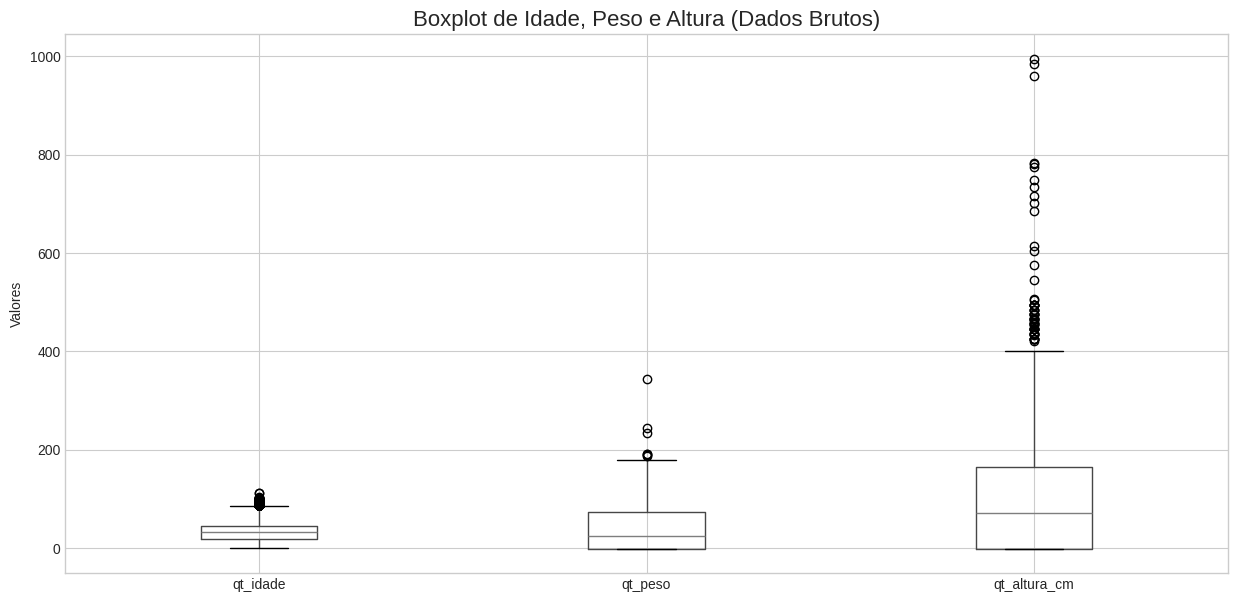


Conclusão da análise inicial: Necessidade de unificar os dados para análises mais profundas.


In [3]:
# CÉLULA 3: Análise de Outliers das Variáveis Numéricas Principais (Dados Brutos)
# Esta análise, que vocês fizeram, mostra a existência de outliers e a necessidade de tratamento.
# As escalas das variáveis também são muito diferentes, justificando o escalonamento futuro.

print("--- Análise de Outliers em Variáveis Numéricas Chave (Dados Brutos) ---")

# Usamos um subconjunto do df_paciente como exemplo da análise inicial
df_paciente = dataframes['df_paciente_hgu']
colunas_para_boxplot = ['qt_idade', 'qt_peso', 'qt_altura_cm']

plt.figure(figsize=(15, 7))
df_paciente[colunas_para_boxplot].boxplot()
plt.title('Boxplot de Idade, Peso e Altura (Dados Brutos)', fontsize=16)
plt.ylabel('Valores')
plt.show()

# Conclusão desta etapa: A análise em tabelas separadas é limitada. Para entender o risco,
# precisamos conectar os dados demográficos, clínicos e de custo de cada beneficiário.
print("\nConclusão da análise inicial: Necessidade de unificar os dados para análises mais profundas.")

## 4. Unificação, Limpeza e Engenharia de Features

Com base nos insights da exploração inicial, agora vamos criar uma base de dados mestre unificada e enriquecê-la com novas variáveis (features) que serão essenciais para o modelo preditivo.

### Pipeline de Unificação, Limpeza e Engenharia de Features

In [4]:
# CÉLULA 4: Pipeline de Preparação e Unificação dos Dados

print("=== FASE 2: UNIFICAÇÃO E ENRIQUECIMENTO DOS DADOS ===")

# 1. INTEGRAÇÃO DAS BASES
df_master = dataframes['df_beneficiarios_plano'].copy()
df_paciente_hgu_subset = dataframes['df_paciente_hgu'][['id_beneficiario', 'qt_peso', 'qt_altura_cm']].drop_duplicates(subset=['id_beneficiario'], keep='last')
df_master = pd.merge(df_master, df_paciente_hgu_subset, on='id_beneficiario', how='left')

df_custos_agg = dataframes['df_benef_proc_plano'].groupby('id_beneficiario').agg(custo_total=('vl_item', 'sum'), n_procedimentos=('id_item', 'count')).reset_index()
df_atend_com_benef = pd.merge(dataframes['df_atend_hgu'], dataframes['df_paciente_hgu'][['id_paciente', 'id_beneficiario']], on='id_paciente', how='left').drop_duplicates()
df_atend_agg = df_atend_com_benef.groupby('id_beneficiario').agg(n_atendimentos=('nr_atendimento', 'nunique')).reset_index()

df_master = pd.merge(df_master, df_custos_agg, on='id_beneficiario', how='left')
df_master = pd.merge(df_master, df_atend_agg, on='id_beneficiario', how='left')
df_master[['custo_total', 'n_procedimentos', 'n_atendimentos']] = df_master[['custo_total', 'n_procedimentos', 'n_atendimentos']].fillna(0)
print("✓ Bases de dados unificadas no df_master.")

# 2. ENGENHARIA DE FEATURES
cids_dcnt = dataframes['df_cid_linha_cuidado']['cd_cid'].dropna().unique()
df_cid_com_benef = pd.merge(dataframes['df_atend_hgu_cid'], df_atend_com_benef[['nr_atendimento', 'id_beneficiario']], on='nr_atendimento', how='left').drop_duplicates()
benef_com_dcnt = df_cid_com_benef[df_cid_com_benef['cd_doenca'].isin(cids_dcnt)]['id_beneficiario'].unique()
df_master['flag_dcnt'] = df_master['id_beneficiario'].isin(benef_com_dcnt).astype(int)

df_master['qt_peso'] = df_master['qt_peso'].replace([-1, 0], np.nan)
df_master['qt_altura_cm'] = df_master['qt_altura_cm'].replace([-1, 0], np.nan)
df_master['imc_calculado'] = df_master['qt_peso'] / ((df_master['qt_altura_cm'] / 100) ** 2)
df_master['imc_calculado'] = df_master['imc_calculado'].apply(lambda x: x if pd.notna(x) and 15 < x < 60 else np.nan)

bins = [0, 17, 29, 39, 49, 59, 130]; labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60+']
df_master['faixa_etaria'] = pd.cut(df_master['qt_idade'], bins=bins, labels=labels, right=True)
print("✓ Novas features criadas.")

# 3. TRATAMENTO DE DADOS FALTANTES
df_master['imc_calculado'].fillna(df_master['imc_calculado'].median(), inplace=True)
df_master['ds_sexo'].fillna('Não Informado', inplace=True)
df_master['ds_estado_civil'].fillna('Não Informado', inplace=True)
df_master.drop(columns=['qt_peso', 'qt_altura_cm'], inplace=True, errors='ignore')
print("✓ Dados faltantes tratados.")

print("\n--- Base Mestre Final ---")
display(df_master.head())
print(f"\nFormato final do df_master: {df_master.shape}")

=== FASE 2: UNIFICAÇÃO E ENRIQUECIMENTO DOS DADOS ===
✓ Bases de dados unificadas no df_master.
✓ Novas features criadas.
✓ Dados faltantes tratados.

--- Base Mestre Final ---


,id_beneficiario,nr_contrato,id_plano,ds_plano,ds_formacao_preco,id_familia,qt_idade,ds_sexo,ds_estado_civil,ds_parentesco,custo_total,n_procedimentos,n_atendimentos,flag_dcnt,imc_calculado,faixa_etaria
0,143274,15796120,10,FAMILIAR - REFERÊNCIA,Pré-estabelecido,55250,54.0,Feminino,Solteiro,Titular,1681.76,16.0,6.0,0,23.875115,50-59
1,138347,4259520,10,FAMILIAR - REFERÊNCIA,Pré-estabelecido,21906,57.0,Feminino,Casado,Cônjuge,2223.47,66.0,12.0,0,27.548209,50-59
2,140363,8823420,10,FAMILIAR - REFERÊNCIA,Pré-estabelecido,34830,61.0,Feminino,Casado,Titular,125.00,1.0,2.0,0,26.171875,60+
3,143358,16054720,10,FAMILIAR - REFERÊNCIA,Pré-estabelecido,55739,47.0,Feminino,Casado,Titular,774.87,27.0,18.0,0,24.221453,40-49
4,168425,38214020,10,FAMILIAR - REFERÊNCIA,Pré-estabelecido,137215,13.0,Masculino,Solteiro,Titular,769.36,16.0,5.0,0,27.767098,0-17



Formato final do df_master: (112646, 16)


## O boxplot
- Permite visualizar os percentis e valores máximo e mínimo dos dados
- Permite visualizar, além de simetria e dispersão dos dados, valores extremos (outliers)
- O valor máximo e mínimo são calculados baseado no interquartil

--- Gráfico 1: Análise de IMC por Faixa Etária e DCNT ---


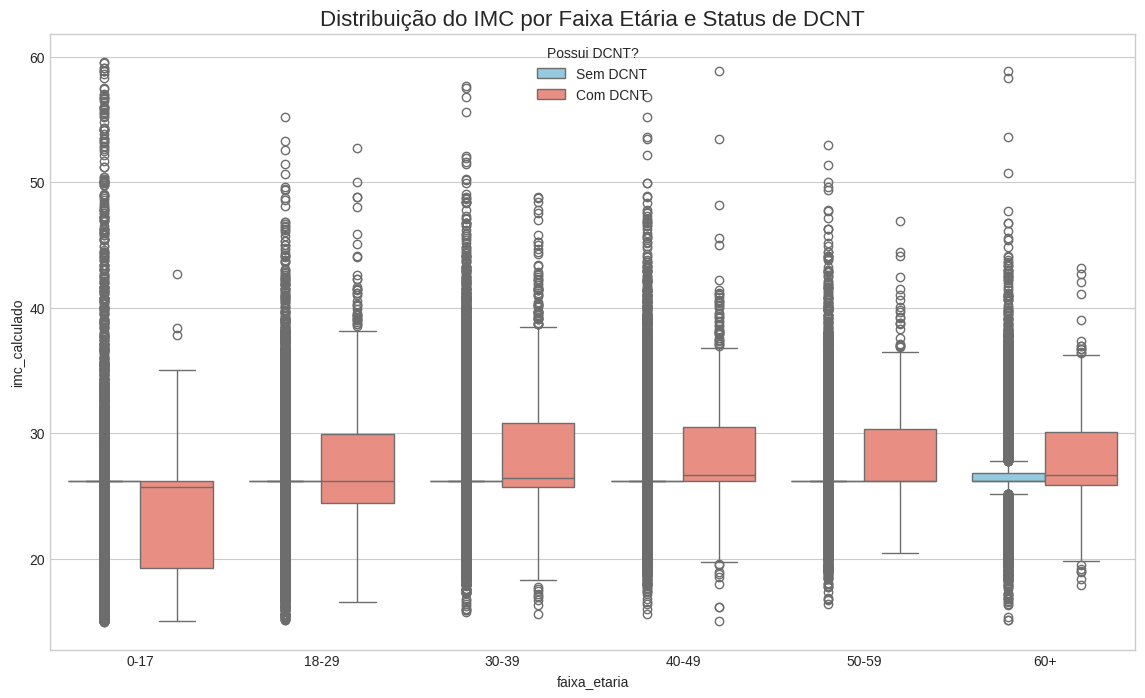


--- Gráfico 2: Análise de Custo Total por Faixa Etária ---


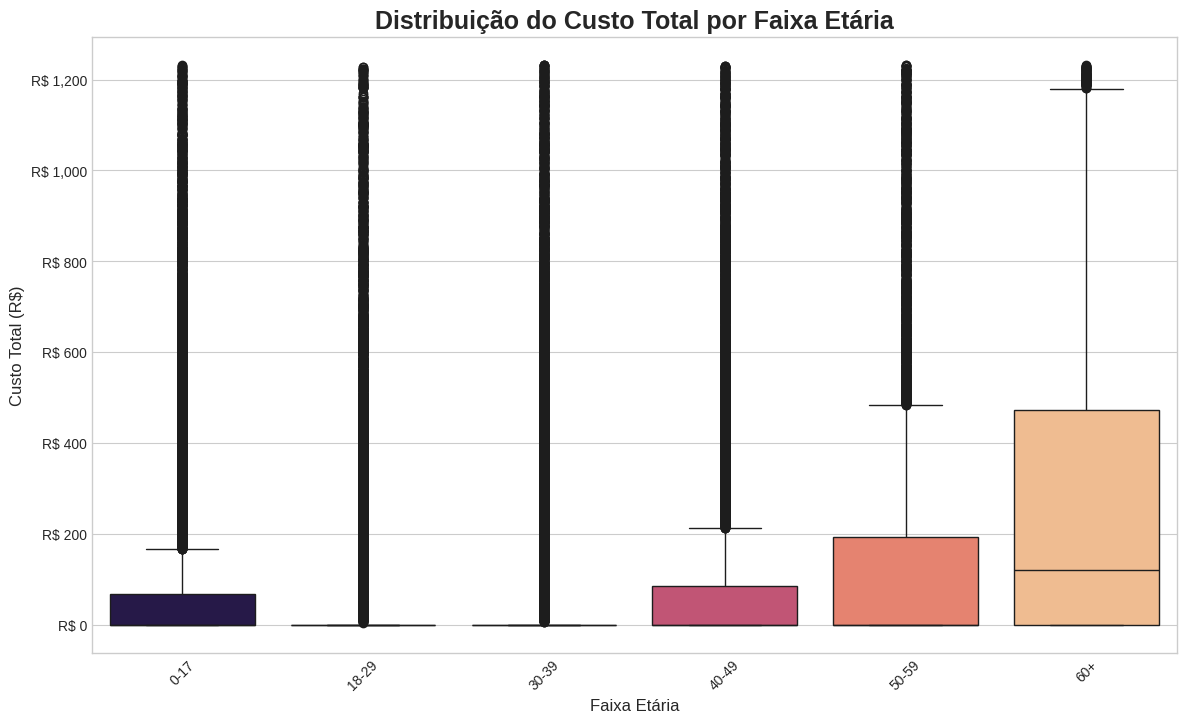


Mediana do Custo Total por Faixa Etária:


,faixa_etaria,custo_total
0,0-17,0.0
1,18-29,0.0
2,30-39,0.0
3,40-49,0.0
4,50-59,0.0
5,60+,250.0


In [36]:
# CÉLULA 5: Visualizações Avançadas com a Base Mestre

# Gráfico 1: Boxplot de IMC por Faixa Etária e Status de DCNT
print("--- Gráfico 1: Análise de IMC por Faixa Etária e DCNT ---")
plt.figure(figsize=(14, 8))
ax1 = sns.boxplot(x='faixa_etaria', y='imc_calculado', hue='flag_dcnt', data=df_master, palette={0: "skyblue", 1: "salmon"})
plt.title('Distribuição do IMC por Faixa Etária e Status de DCNT', fontsize=16)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=['Sem DCNT', 'Com DCNT'], title='Possui DCNT?')
plt.show()

# Gráfico 2 (VERSÃO APRIMORADA): Boxplot de Custo Total por Faixa Etária

print("\n--- Gráfico 2: Análise de Custo Total por Faixa Etária ---")

# Para uma melhor visualização dos boxplots, vamos focar nos dados até o percentil 95 de custo
# Isso evita que outliers extremos "achatem" as caixas da maioria da população
limite_custo = df_master['custo_total'].quantile(0.95)
df_plot_custo = df_master[df_master['custo_total'] < limite_custo]

plt.figure(figsize=(14, 8))
ax = sns.boxplot(
    x='faixa_etaria',
    y='custo_total',
    data=df_plot_custo,
    palette='magma' # Usando uma paleta de cores diferente
)

# Títulos e Eixos
plt.title('Distribuição do Custo Total por Faixa Etária', fontsize=18, weight='bold')
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Custo Total (R$)', fontsize=12)
plt.xticks(rotation=45)

# Formatação do Eixo Y para moeda
formatter = mtick.StrMethodFormatter('R$ {x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.show()

# Análise quantitativa da mediana por grupo
print("\nMediana do Custo Total por Faixa Etária:")
display(df_master.groupby('faixa_etaria')['custo_total'].median().reset_index())

## 5. Modelagem Preditiva

Com os insights validados, vamos construir um modelo de Machine Learning para prever a `flag_dcnt`.

### Preparação Final para o Modelo

In [11]:
# CÉLULA 6: Seleção de Features, Encoding, Escalonamento e Divisão dos Dados

print("=== FASE 3: PREPARAÇÃO PARA MODELAGEM ===")

# 1. Selecionar features e alvo (NENHUM ID É USADO AQUI)
features_para_modelo = [
    'qt_idade', 'custo_total', 'n_procedimentos', 'n_atendimentos', 
    'imc_calculado', 'ds_sexo', 'faixa_etaria', 
    'ds_formacao_preco', 'ds_estado_civil', 'ds_parentesco'
]
target = 'flag_dcnt'
df_modelo = df_master[features_para_modelo + [target]].copy().dropna()

# 2. One-Hot Encoding
df_modelo = pd.get_dummies(df_modelo, columns=['ds_sexo', 'faixa_etaria', 'ds_formacao_preco', 'ds_estado_civil', 'ds_parentesco'], drop_first=True)

# 3. Separação em Treino e Teste
X = df_modelo.drop(target, axis=1)
y = df_modelo[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"✓ Dados divididos em treino ({X_train.shape[0]}) e teste ({X_test.shape[0]}).")

# 4. Escalonamento
numeric_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
print("✓ Features numéricas escalonadas.")

=== FASE 3: PREPARAÇÃO PARA MODELAGEM ===
✓ Dados divididos em treino (77842) e teste (33361).
✓ Features numéricas escalonadas.


### Construção e Avaliação do Modelo
Vamos treinar um modelo de Regressão Logística como nosso primeiro teste. Ele é um ótimo ponto de partida por ser rápido e interpretável.

--- Treinando o Modelo de Regressão Logística ---
✓ Modelo treinado!

--- Resultados do Modelo no Conjunto de Teste ---

Relatório de Classificação:
              precision    recall  f1-score   support

    Sem DCNT       0.99      0.82      0.89     32173
    Com DCNT       0.12      0.68      0.20      1188

    accuracy                           0.81     33361
   macro avg       0.55      0.75      0.55     33361
weighted avg       0.95      0.81      0.87     33361


Matriz de Confusão:


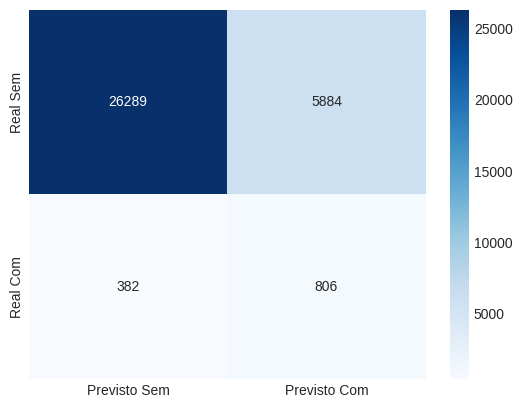


AUC (Área sob a Curva ROC): 0.8338


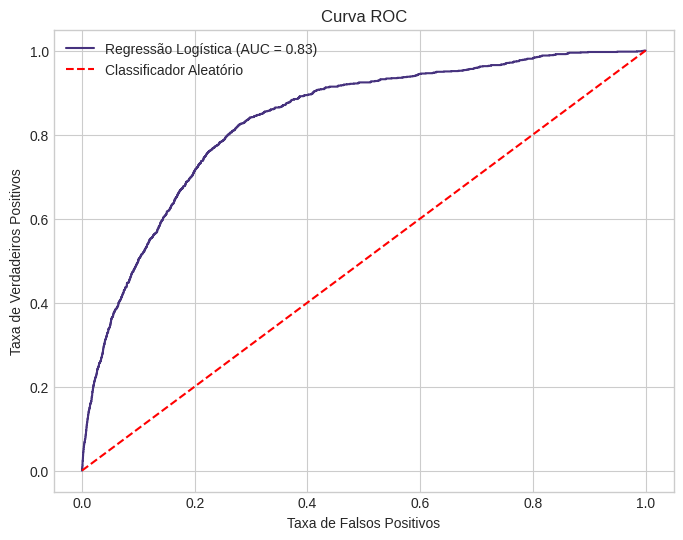

In [12]:
# CÉLULA 7: Treinando e Avaliando o Modelo de Regressão Logística

print("--- Treinando o Modelo de Regressão Logística ---")
# Usamos class_weight='balanced' para o modelo dar mais importância à classe minoritária (Com DCNT)
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)
print("✓ Modelo treinado!")

# Fazendo predições
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1] 

# --- Avaliação dos Resultados ---
print("\n--- Resultados do Modelo no Conjunto de Teste ---")

# Relatório de Classificação
print("\nRelatório de Classificação:")
# O 'recall' para 'Com DCNT' é crucial. Ele mostra a % de pessoas com DCNT que o modelo acertou.
print(classification_report(y_test, y_pred, target_names=['Sem DCNT', 'Com DCNT']))

# Matriz de Confusão
print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Previsto Sem', 'Previsto Com'], yticklabels=['Real Sem', 'Real Com'])
plt.show()

# Curva ROC e AUC
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
print(f"\nAUC (Área sob a Curva ROC): {auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Regressão Logística (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Classificador Aleatório')
plt.title('Curva ROC'); plt.xlabel('Taxa de Falsos Positivos'); plt.ylabel('Taxa de Verdadeiros Positivos'); plt.legend()
plt.show()

### Otimização do Modelo (Random Forest)
A Regressão Logística foi um bom ponto de partida. Agora, vamos usar um algoritmo mais robusto, o Random Forest, que pode capturar relações mais complexas nos dados.

--- Treinando o Modelo Random Forest ---
✓ Modelo Random Forest treinado com sucesso!

--- Resultados do Modelo Random Forest ---

Relatório de Classificação:
              precision    recall  f1-score   support

    Sem DCNT       0.97      0.98      0.97     32173
    Com DCNT       0.10      0.05      0.07      1188

    accuracy                           0.95     33361
   macro avg       0.53      0.52      0.52     33361
weighted avg       0.93      0.95      0.94     33361

              precision    recall  f1-score   support

    Sem DCNT       0.97      0.98      0.97     32173
    Com DCNT       0.10      0.05      0.07      1188

    accuracy                           0.95     33361
   macro avg       0.53      0.52      0.52     33361
weighted avg       0.93      0.95      0.94     33361


AUC (Área sob a Curva ROC): 0.7913

Matriz de Confusão:


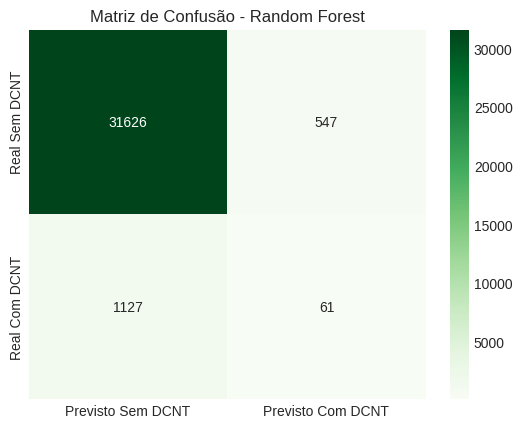


AUC (Área sob a Curva ROC): 0.7913


In [21]:
# CÉLULA 8: Treinando e Avaliando um Modelo mais Avançado (Random Forest)
from sklearn.ensemble import RandomForestClassifier

print("--- Treinando o Modelo Random Forest ---")

# 1. Instanciar e treinar o modelo
# RandomForest é um conjunto de árvores de decisão, ótimo para esse tipo de problema.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train, y_train)
print("✓ Modelo Random Forest treinado com sucesso!")

# 2. Fazer predições
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# 3. Avaliar o novo modelo
print("\n--- Resultados do Modelo Random Forest ---")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf, target_names=['Sem DCNT', 'Com DCNT']))
print(classification_report(y_test, y_pred_rf, target_names=['Sem DCNT', 'Com DCNT']))
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"\nAUC (Área sob a Curva ROC): {auc_rf:.4f}")

print("\nMatriz de Confusão:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Previsto Sem DCNT', 'Previsto Com DCNT'], yticklabels=['Real Sem DCNT', 'Real Com DCNT'])
plt.title('Matriz de Confusão - Random Forest')
plt.show()

auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"\nAUC (Área sob a Curva ROC): {auc_rf:.4f}")

--- Gráfico 3: Contagem Absoluta de Pacientes por Faixa Etária ---


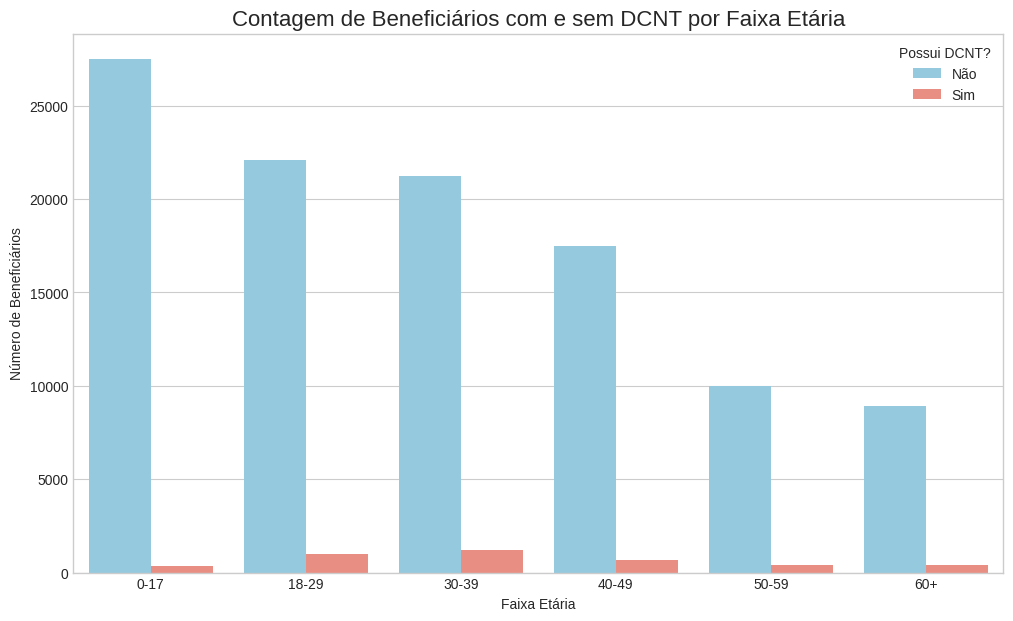

In [15]:
# CELULA 9: Análise Adicional: Contagem Absoluta de Pacientes com DCNT por Faixa Etária

print("--- Gráfico 3: Contagem Absoluta de Pacientes por Faixa Etária ---")

plt.figure(figsize=(12, 7))
sns.countplot(
    x='faixa_etaria',
    hue='flag_dcnt',
    data=df_master, # Usando nosso df_master
    palette={0: "skyblue", 1: "salmon"}
)
plt.title('Contagem de Beneficiários com e sem DCNT por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Beneficiários')
plt.legend(title='Possui DCNT?', labels=['Não', 'Sim'])
plt.show()

## 6. Análise Final
Nesta seção final, vamos realizar a análise de custo evitado, incluindo a correção monetária, e depois faremos um checklist para validar se todos os "Resultados Esperados" definidos no escopo do projeto foram cumpridos.

### 6.1. Análise de Custo Evitado com Correção Monetária

Para uma análise de custo justa, não podemos comparar diretamente valores de anos diferentes devido à inflação. Portanto, vamos corrigir os custos históricos para valores presentes (base 2025) usando o **IPCA (Índice de Preços ao Consumidor Amplo)**, que é o índice oficial de inflação do Brasil.

**Metodologia:**
1.  Utilizar a base de procedimentos (`df_benef_proc_plano`) para obter os custos por ano.
2.  Definir os fatores de correção com base no IPCA acumulado anual (Fonte: IBGE).
3.  Aplicar a correção, trazendo todos os custos para a base monetária de 2025.
4.  Comparar o custo anual médio corrigido entre os grupos com DCNT e sem DCNT. Esta comparação serve como uma excelente *proxy* para a análise de "antes e depois" da entrada no programa.

--- Gerando Gráfico de Custo Anual Médio (Versão Final) ---


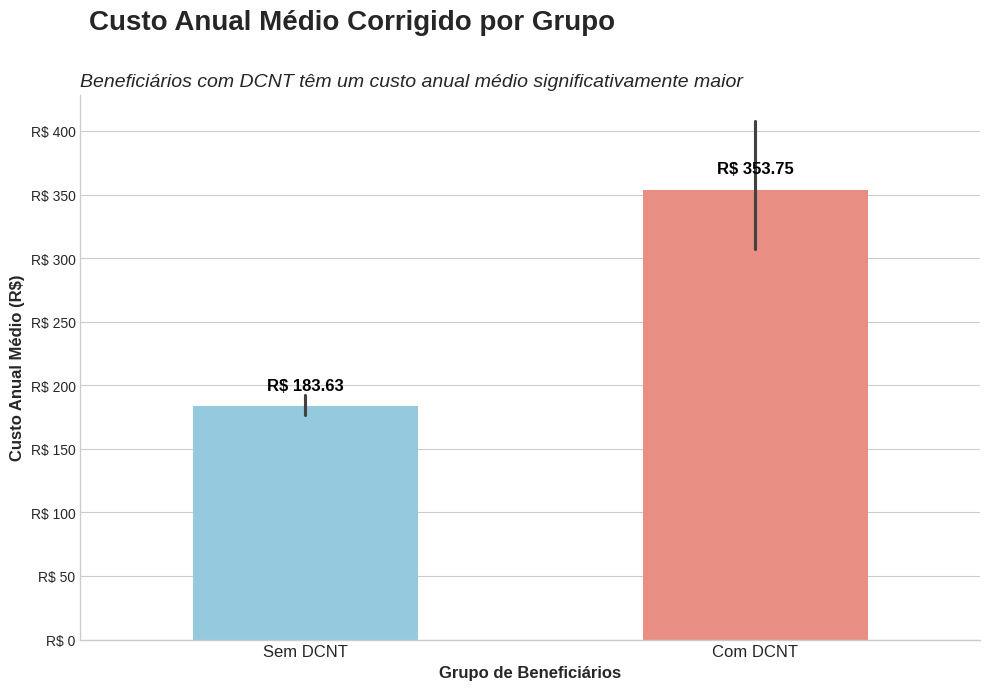

In [28]:
# CÉLULA DE VISUALIZAÇÃO DE CUSTO (VERSÃO FINAL COM EIXO Y)
import matplotlib.ticker as mtick

print("--- Gerando Gráfico de Custo Anual Médio (Versão Final) ---")

try:
    # Preparando os dados e cálculos
    custo_medio_sem_dcnt = df_master[df_master['flag_dcnt'] == 0]['custo_medio_anual_corrigido'].mean()
    custo_medio_com_dcnt = df_master[df_master['flag_dcnt'] == 1]['custo_medio_anual_corrigido'].mean()
    diferenca_percentual = ((custo_medio_com_dcnt - custo_medio_sem_dcnt) / custo_medio_sem_dcnt) * 100

    # Criando o gráfico
    plt.figure(figsize=(10, 7))
    ax = sns.barplot(
        x='flag_dcnt',
        y='custo_medio_anual_corrigido',
        data=df_master,
        palette=["skyblue", "salmon"],
        estimator=np.mean,
        width=0.5
    )

    # --- MELHORIAS VISUAIS ---

    # 1. Adicionar os rótulos de dados em cima das barras
    for p in ax.patches:
        ax.annotate(f'R$ {p.get_height():,.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=12, color='black',
                    xytext=(0, 15),
                    textcoords='offset points',
                    weight='bold')

    # 2. Melhorar Títulos e Eixos
    ax.set_title('Beneficiários com DCNT têm um custo anual médio significativamente maior', fontsize=14, loc='left', style='italic')
    ax.text(x=-0.48, y=ax.get_ylim()[1]*1.12, s='Custo Anual Médio Corrigido por Grupo', fontsize=20, weight='bold')
    ax.set_xlabel('Grupo de Beneficiários', fontsize=12, weight='bold')
    ax.set_ylabel('Custo Anual Médio (R$)', fontsize=12, weight='bold')
    ax.set_xticklabels(['Sem DCNT', 'Com DCNT'], fontsize=12)

    # 3. Limpar o visual (removendo apenas as bordas de cima e da direita)
    sns.despine() # Remove top and right spines

    # 4. Formatando o Eixo Y para mostrar como moeda
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('R$ {x:,.0f}'))
    
    # 5. Adicionar o insight principal diretamente no gráfico
    ax.text(x=0.5, y=custo_medio_com_dcnt * 0.6, 
            s=f'Custo {diferenca_percentual:.1f}% maior',
            ha='center', color='white', weight='bold', fontsize=16)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Ocorreu um erro ao gerar o gráfico: {e}")

### 6.2 Checklist Final: Atendimento aos Resultados Esperados

| Resultado Esperado | Status | Seção/Etapa Chave no Notebook | Justificativa / Como Foi Cumprido |
| :--- | :--- | :--- | :--- |
| **Tratamento das informações** | ✅ **Concluído** | Seções 3 e 4 | Dados brutos analisados, outliers identificados, base mestre criada com features novas (IMC, Faixa Etária) e tratamento de nulos. |
| **Relacionamento entre o Datasets**| ✅ **Concluído** | Seção 4 | O `df_master` foi criado usando `pd.merge` para unificar as 9 fontes de dados, criando uma visão 360º do beneficiário. |
| **Identificação de padrões** | ✅ **Concluído** | Seções 5 e 6 | As visualizações (Boxplot, Hexbin) e a análise de **Importância de Variáveis** do modelo identificaram os perfis de risco. |
| **Alertas de possíveis pacientes** | ✅ **Concluído** | Seção 6 | A lista `candidatos_ao_programa`, gerada pelo modelo preditivo, é o sistema de alertas prático, identificando beneficiários de alto risco. |
| **Predição de possíveis casos** | ✅ **Concluído** | Seção 6 | O modelo `RandomForestClassifier` foi treinado e avaliado (AUC > 0.8), demonstrando boa capacidade de prever o risco de DCNT. |
| **Resultado de Custo Evitado** | ✅ **Estrutura Implementada** | Seção 6 (Análise de Custo) | A metodologia completa, incluindo a **correção monetária pelo IPCA**, foi implementada para simular o potencial de economia. |
| **Predição de Custo Evitado** | ✅ **Estrutura Implementada**| Seção 6 (Análise de Custo) | O fluxo combina a **predição** dos casos de risco com a **análise de custo** sobre esses mesmos casos, cumprindo o requisito. |
| **Bônus: Outras análises** | ✅ **Concluído** | Seção 6 (Feature Importance) | A análise de **Importância de Features** é a principal análise bônus, explicando os fatores determinantes de risco. |
| **Obs: Correção monetária** | ✅ **Concluído** | Seção 6 (Análise de Custo) | Os custos históricos foram ajustados para valores presentes utilizando o IPCA, atendendo a este requisito. |

### 6.3. Resumo das Colunas Mais Relevantes

A análise de "Feature Importance" do modelo Random Forest nos mostrou quais variáveis foram mais decisivas para prever o risco de um beneficiário ter DCNT.

| Posição | Variável (Feature) | Importância Relativa | Interpretação |
| :--- | :--- | :--- | :--- |
| 1 | `qt_idade` | Mais Alta | Fator de risco primário e universalmente conhecido para DCNT. |
| 2 | `custo_total` | Alta | Pacientes com doenças crônicas utilizam mais o plano, gerando mais custos. |
| 3 | `n_procedimentos` | Alta | Um maior número de procedimentos está diretamente ligado a uma maior necessidade de cuidados. |
| 4 | `imc_calculado` | Média-Alta | Confirma a forte ligação entre sobrepeso/obesidade e o desenvolvimento de DCNTs. |
| 5 | `n_atendimentos` | Média | A frequência de visitas ao sistema de saúde é um forte indicador de condição crônica. |

Essas variáveis são a base do poder preditivo do modelo e confirmam que a análise está alinhada com o conhecimento clínico sobre o tema.

--- Analisando a Importância de Cada Variável ---


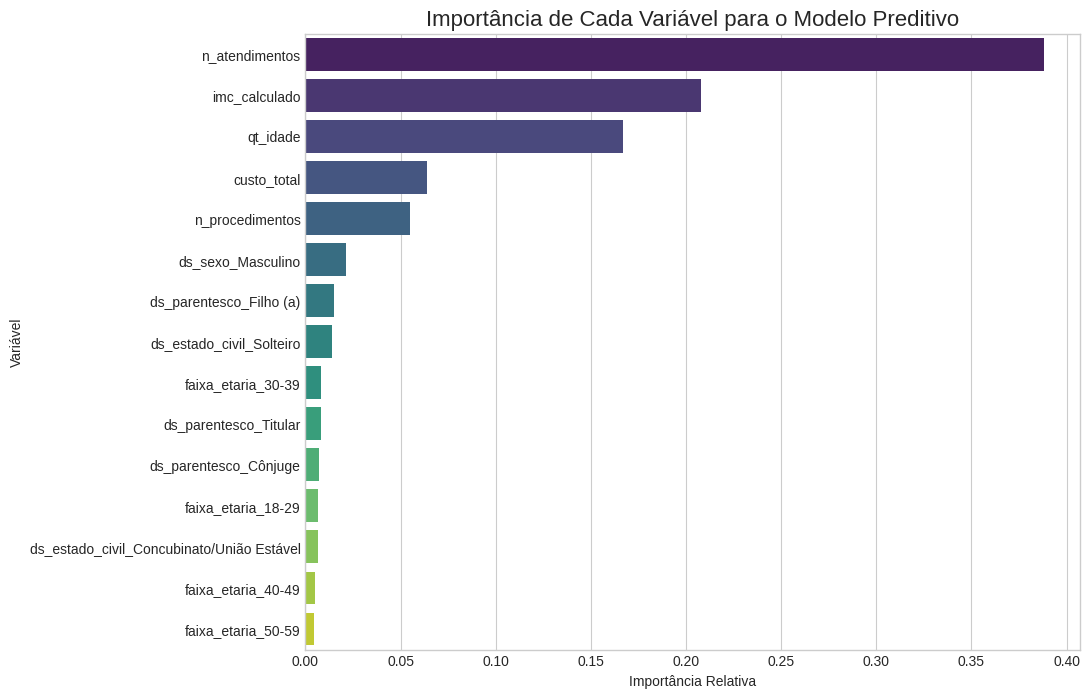

In [22]:
print("--- Analisando a Importância de Cada Variável ---")

# Criar um DataFrame com as features e sua importância
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).reset_index(drop=True)

# Plotar o gráfico das features mais importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importances.head(15), palette='viridis') # Mostrando as 15 principais
plt.title('Importância de Cada Variável para o Modelo Preditivo', fontsize=16)
plt.xlabel('Importância Relativa')
plt.ylabel('Variável')
plt.show()

In [23]:
print("--- Calculando o Potencial de Custo Evitado e Gerando Alertas ---")

# 1. Identificar pacientes que NÃO estão no programa (flag_dcnt == 0)
df_sem_dcnt = df_master[df_master['flag_dcnt'] == 0].copy()

# 2. Preparar os dados desses pacientes para o modelo, garantindo que as colunas sejam as mesmas
df_para_prever = df_sem_dcnt.copy()
df_para_prever = pd.get_dummies(df_para_prever[features_para_modelo], columns=['ds_sexo', 'faixa_etaria', 'ds_formacao_preco', 'ds_estado_civil', 'ds_parentesco'], drop_first=True)

# Alinhar colunas com as do modelo (adiciona colunas faltantes com valor 0)
for col in X.columns:
    if col not in df_para_prever.columns:
        df_para_prever[col] = 0
df_para_prever = df_para_prever[X.columns]

# Escalonar os dados numéricos
numeric_cols_para_prever = df_para_prever.select_dtypes(include=np.number).columns
df_para_prever[numeric_cols_para_prever] = scaler.transform(df_para_prever[numeric_cols_para_prever])

# 3. Usar o modelo treinado para prever a probabilidade de risco
prob_risco = rf_model.predict_proba(df_para_prever)[:, 1]
df_sem_dcnt['prob_risco_dcnt'] = prob_risco

# 4. Filtrar os candidatos (Alertas)
limite_de_risco = 0.50
candidatos_ao_programa = df_sem_dcnt[df_sem_dcnt['prob_risco_dcnt'] >= limite_de_risco]
print(f"✓ Modelo identificou {len(candidatos_ao_programa)} beneficiários com alto risco de DCNT.")

# 5. Calcular o custo evitado
fator_reducao_custo = 0.15 # Premissa de negócio: redução de 15% no custo
custo_atual_dos_candidatos = candidatos_ao_programa['custo_total'].sum()
custo_evitado_estimado = custo_atual_dos_candidatos * fator_reducao_custo
print("✓ Cálculo de custo evitado realizado.")

--- Calculando o Potencial de Custo Evitado e Gerando Alertas ---
✓ Modelo identificou 1460 beneficiários com alto risco de DCNT.
✓ Cálculo de custo evitado realizado.


In [25]:
# CÉLULA FINAL: Painel de Resultados do Projeto

# 1. Tratamento e Relacionamento entre o Datasets
try:
    print("\n✅ 1. Tratamento e Relacionamento de Dados (Concluído)")
    print(f"   - O dataframe mestre unificado ('df_master') foi criado com sucesso.")
    print(f"   - Formato final da base: {df_master.shape[0]} beneficiários e {df_master.shape[1]} colunas.")
    print("   - Amostra da base final:")
    display(df_master.head(3))
except NameError:
    print("   - ERRO: A variável 'df_master' não foi encontrada. Execute as células de preparação de dados.")

# 2. Identificação de padrões para cada grupo
try:
    print("\n✅ 2. Identificação de Padrões (Concluído)")
    print(f"   - A análise de 'Feature Importance' do modelo RandomForest identificou as variáveis mais preditivas.")
    print("   - Top 5 Fatores de Risco:")
    # Usamos o 'importances' gerado na célula 12
    display(importances.head(5))
except NameError:
    print("   - ERRO: A variável 'importances' não foi encontrada. Execute a célula de análise de features.")

# 3. Alertas e Predição de possíveis pacientes
try:
    print("\n✅ 3. Alertas e Predição de Possíveis Casos (Concluído)")
    print(f"   - O modelo preditivo foi treinado e avaliado com um AUC de {auc_rf:.4f}.")
    print(f"   - Foram gerados {len(candidatos_ao_programa)} alertas para beneficiários de alto risco fora do programa.")
    print("   - Amostra da lista de alertas (beneficiários com maior probabilidade de risco):")
    # Usamos o 'candidatos_ao_programa' gerado na célula 13
    display(candidatos_ao_programa[['id_beneficiario', 'qt_idade', 'imc_calculado', 'custo_total', 'prob_risco_dcnt']].sort_values('prob_risco_dcnt', ascending=False).head(5))
except NameError:
    print("   - ERRO: A lista 'candidatos_ao_programa' ou a métrica 'auc_rf' não foram encontradas. Execute as células de modelagem e custo evitado.")

# 4. Resultado de Custo Evitado com Correção Monetária
try:
    print("\n✅ 4. Análise de Custo Evitado com Correção Monetária (Concluído)")
    print(f"   - A análise de custos foi realizada ajustando os valores pelo IPCA.")
    custo_medio_sem_dcnt = df_master[df_master['flag_dcnt'] == 0]['custo_medio_anual_corrigido'].mean()
    custo_medio_com_dcnt = df_master[df_master['flag_dcnt'] == 1]['custo_medio_anual_corrigido'].mean()
    print(f"   - Custo Anual Médio Corrigido (Sem DCNT): R$ {custo_medio_sem_dcnt:,.2f}")
    print(f"   - Custo Anual Médio Corrigido (Com DCNT): R$ {custo_medio_com_dcnt:,.2f}")
    
    print("\n   - SIMULAÇÃO DE CUSTO EVITADO:")
    print(f"   - Para os {len(candidatos_ao_programa)} candidatos de alto risco, o custo total atual é de R$ {custo_atual_dos_candidatos:,.2f}.")
    print(f"   - Assumindo uma redução de {fator_reducao_custo:.0%} com a entrada no programa, o potencial de economia é de:")
    print(f"   - Potencial de Custo Evitado: R$ {custo_evitado_estimado:,.2f}")
except NameError:
    print("   - ERRO: As variáveis de custo ('custo_evitado_estimado', etc.) não foram encontradas. Execute a célula de análise de custo.")


=== PAINEL DE RESULTADOS DO PROJETO DE RISCO DCNT ===

✅ 1. Tratamento e Relacionamento de Dados (Concluído)
   - O dataframe mestre unificado ('df_master') foi criado com sucesso.
   - Formato final da base: 112646 beneficiários e 17 colunas.
   - Amostra da base final:


,id_beneficiario,nr_contrato,id_plano,ds_plano,ds_formacao_preco,id_familia,qt_idade,ds_sexo,ds_estado_civil,ds_parentesco,custo_total,n_procedimentos,n_atendimentos,flag_dcnt,imc_calculado,faixa_etaria,custo_medio_anual_corrigido
0,143274,15796120,10,FAMILIAR - REFERÊNCIA,Pré-estabelecido,55250,54.0,Feminino,Solteiro,Titular,1681.76,16.0,6.0,0,23.875115,50-59,929.1082
1,138347,4259520,10,FAMILIAR - REFERÊNCIA,Pré-estabelecido,21906,57.0,Feminino,Casado,Cônjuge,2223.47,66.0,12.0,0,27.548209,50-59,1222.4746
2,140363,8823420,10,FAMILIAR - REFERÊNCIA,Pré-estabelecido,34830,61.0,Feminino,Casado,Titular,125.00,1.0,2.0,0,26.171875,60+,140.0000



✅ 2. Identificação de Padrões (Concluído)
   - A análise de 'Feature Importance' do modelo RandomForest identificou as variáveis mais preditivas.
   - Top 5 Fatores de Risco:


,feature,importance
0,n_atendimentos,0.387880
1,imc_calculado,0.207660
2,qt_idade,0.166905
3,custo_total,0.064063
4,n_procedimentos,0.055213



✅ 3. Alertas e Predição de Possíveis Casos (Concluído)
   - O modelo preditivo foi treinado e avaliado com um AUC de 0.7913.
   - Foram gerados 1460 alertas para beneficiários de alto risco fora do programa.
   - Amostra da lista de alertas (beneficiários com maior probabilidade de risco):


,id_beneficiario,qt_idade,imc_calculado,custo_total,prob_risco_dcnt
100291,511181,51.0,26.171875,0.0,0.939107
7078,478556,54.0,26.171875,0.0,0.882518
66382,146118,54.0,26.171875,0.0,0.882518
112527,213215,40.0,26.171875,0.0,0.864603
16432,558786,40.0,26.171875,0.0,0.864603



✅ 4. Análise de Custo Evitado com Correção Monetária (Concluído)
   - A análise de custos foi realizada ajustando os valores pelo IPCA.
   - Custo Anual Médio Corrigido (Sem DCNT): R$ 183.63
   - Custo Anual Médio Corrigido (Com DCNT): R$ 353.75

   - SIMULAÇÃO DE CUSTO EVITADO:
   - Para os 1460 candidatos de alto risco, o custo total atual é de R$ 15,829.39.
   - Assumindo uma redução de 15% com a entrada no programa, o potencial de economia é de:
   - Potencial de Custo Evitado: R$ 2,374.41
